In [ ]:
# imported necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

1) load the dataset

In [144]:
gdp = pd.read_excel("gdp_pcap.xlsx")
life_expectancy = pd.read_excel("lex.xlsx")
population = pd.read_excel("pop.xlsx")

2) Data merging. 

In [145]:
population_melted = population.melt(id_vars=["country"], var_name="year", value_name="population")
life_expectancy_melted = life_expectancy.melt(id_vars=["country"], var_name="year", value_name="life_expectancy")
gdp_melted = gdp.melt(id_vars=["country"], var_name="year", value_name="gdp")

# Merge the melted DataFrames on 'country' and 'year'
merged_df = pd.merge(population_melted, life_expectancy_melted, on=["country", "year"])
final_df = pd.merge(merged_df, gdp_melted, on=["country", "year"])

# Reorder columns
final_df = final_df[["country", "year", "population", "life_expectancy", "gdp"]]

In [146]:
final_df["population"]

0        3.28M
1        1.57M
2         400k
3         2650
4        40.2k
         ...  
58690     384k
58691     110M
58692    94.3M
58693    64.5M
58694    37.2M
Name: population, Length: 58695, dtype: object

3) Data cleaning and preparation

In [ ]:
# to convert strings like 3.2B, 1.5B etc. to integer and float types.
def convert_string_to_int(str_):
    if isinstance(str_, str):
        # Handle 'm' (million) and 'k' (thousand)
        if 'M' in str_:
            return int(float(str_.replace('M', '').strip()) * 1_000_000)
        elif 'B' in str_:
            return int(float(str_.replace('B', '').strip()) * 1_000_000_000)
        elif 'k' in str_:
            return int(float(str_.replace('k', '').strip()) * 1_000)
        else:
            return int(str_)  # If no 'm' or 'k', assume it's a regular number
    return str_

# Apply the conversion function to the 'population' and 'gdp columns' column
final_df['population'] = final_df['population'].apply(convert_string_to_int)
final_df['gdp'] = final_df['gdp'].apply(convert_string_to_int)

In [ ]:
# see how much nan values in data
print(final_df.isna().sum())

country               0
year                  0
population            0
life_expectancy    1350
gdp                   0
dtype: int64


In [ ]:

# see how nan values seen
nan_rows = final_df[final_df.isna().any(axis=1)]
print(nan_rows)

                   country  year  population  life_expectancy   gdp
3                  Andorra  1800        2650              NaN  1370
46                Dominica  1800       19900              NaN   538
93     St. Kitts and Nevis  1800       17200              NaN  1330
107                 Monaco  1800        7790              NaN  2230
112       Marshall Islands  1800        5830              NaN   617
...                    ...   ...         ...              ...   ...
29167     Marshall Islands  1949       13600              NaN  1520
29186                Nauru  1949        3340              NaN  4270
29193                Palau  1949        7370              NaN  9730
29211           San Marino  1949       13000              NaN  8800
29233               Tuvalu  1949        4730              NaN  1610

[1350 rows x 5 columns]


In [ ]:
# data imputation by using ffill.
final_df_ffill = final_df.ffill()

/tmp/ipykernel_720/2524152267.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df_ffill = final_df.ffill()


In [153]:
print(final_df_ffill[final_df_ffill.isna().any(axis=1)])

Empty DataFrame
Columns: [country, year, population, life_expectancy, gdp]
Index: []


In [ ]:
# rename gdp to GDP
final_df_ffill.rename(columns={'gdp': 'GDP'}, inplace=True)
final_df_ffill

,country,year,population,life_expectancy,GDP
0,Afghanistan,1800,3280000,28.2,481
1,Angola,1800,1570000,27.0,373
2,Albania,1800,400000,35.4,469
3,Andorra,1800,2650,35.4,1370
4,UAE,1800,40200,30.7,1140
...,...,...,...,...,...
58690,Samoa,2100,384000,82.3,28600
58691,Yemen,2100,110000000,82.1,7650
58692,South Africa,2100,94300000,75.2,50100
58693,Zambia,2100,64500000,74.5,20300


4) Data exploration

In [155]:
final_df_ffill.head(5)

,country,year,population,life_expectancy,GDP
0,Afghanistan,1800,3280000,28.2,481
1,Angola,1800,1570000,27.0,373
2,Albania,1800,400000,35.4,469
3,Andorra,1800,2650,35.4,1370
4,UAE,1800,40200,30.7,1140


In [156]:
final_df_ffill.tail(5)

,country,year,population,life_expectancy,GDP
58690,Samoa,2100,384000,82.3,28600
58691,Yemen,2100,110000000,82.1,7650
58692,South Africa,2100,94300000,75.2,50100
58693,Zambia,2100,64500000,74.5,20300
58694,Zimbabwe,2100,37200000,71.3,12200


In [157]:
countries = final_df_ffill["country"].nunique()
print(f"Number of Countries===> {countries}")

Number of Countries===> 195


In [158]:
df_1997 = final_df[final_df["year"]==1997]
df_1997.head()

,country,year,population,life_expectancy,gdp
38415,Afghanistan,1997,18500000,54.5,1180
38416,Angola,1997,14700000,51.6,4000
38417,Albania,1997,3230000,72.9,4330
38418,Andorra,1997,64700,80.2,43600
38419,UAE,1997,2820000,69.0,88600


5) Data Filtering

In [ ]:
# here I just created a dummy continent dict. I didnt find continent information in my datasets. 
continents = {"Africa": {"Angola", "Somalia", "Zimbabwe", "Zambia", "South Africa", "Kenya"}, "Asia": {"Turkey", "Iran", "Mongolia"}}

In [ ]:
# I filtered out Africa
final_df_ffill[final_df_ffill["country"].isin(continents["Africa"])]

,country,year,population,life_expectancy,GDP
1,Angola,1800,1570000,27.0,373
89,Kenya,1800,2570000,25.5,737
157,Somalia,1800,989000,29.4,794
192,South Africa,1800,1450000,33.5,1750
193,Zambia,1800,747000,32.6,533
...,...,...,...,...,...
58589,Kenya,2100,104000000,80.3,30500
58657,Somalia,2100,67400000,72.7,4700
58692,South Africa,2100,94300000,75.2,50100
58693,Zambia,2100,64500000,74.5,20300


In [161]:
less_1_million = final_df_ffill[final_df_ffill["population"]>=1000000]

In [162]:
less_1_million.head()

,country,year,population,life_expectancy,GDP
0,Afghanistan,1800,3280000,28.2,481
1,Angola,1800,1570000,27.0,373
9,Austria,1800,3000000,34.4,1940
12,Belgium,1800,3250000,40.0,2660
14,Burkina Faso,1800,1670000,29.2,595


6) Data Organization

In [163]:
sorted_df = final_df_ffill.sort_values(by='life_expectancy', ascending=True, inplace=False)
sorted_df.head()

,country,year,population,life_expectancy,GDP
55062,"Hong Kong, China",2082,3290000,0.0,83900
52917,"Hong Kong, China",2071,4240000,0.0,81300
52722,"Hong Kong, China",2070,4330000,0.0,81000
52527,"Hong Kong, China",2069,4410000,0.0,80700
52332,"Hong Kong, China",2068,4500000,0.0,80500


In [ ]:
# I created a new column due to given threshold.
bins = [0, 10_000_000, 50_000_000, float('inf')]  # Low, Medium, High
labels = ['Low', 'Medium', 'High']

# Create a new column 'population_category' based on the thresholds
final_df_ffill['population_category'] = pd.cut(final_df_ffill['population'], bins=bins, labels=labels, right=False)
final_df_ffill.head()


,country,year,population,life_expectancy,GDP,population_category
0,Afghanistan,1800,3280000,28.2,481,Low
1,Angola,1800,1570000,27.0,373,Low
2,Albania,1800,400000,35.4,469,Low
3,Andorra,1800,2650,35.4,1370,Low
4,UAE,1800,40200,30.7,1140,Low


In [ ]:
# I created contitnets by given country names in dataset
continents = {
    'Africa': [
        'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon', 
        'Central African Republic', 'Comoros', 'Democratic Republic of the Congo', 
        'Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 
        'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 
        'Kenya', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 
        'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Seychelles', 
        'Sierra Leone', 'Somalia', 'South Africa', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 
        'Zambia', 'Zimbabwe'
    ],
    'Asia': [
        'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 
        'Cambodia', 'China', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 
        'Kazakhstan', 'Kuwait', 'Kyrgyz Republic', 'Laos', 'Lebanon', 'Maldives', 'Mongolia', 'Myanmar', 
        'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 
        'Sri Lanka', 'Syria', 'Tajikistan', 'Taiwan', 'Turkmenistan', 'Uzbekistan', 'Vietnam', 'Yemen', 'United Arab Emirates'
    ],
    'Europe': [
        'Albania', 'Andorra', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 
        'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 
        'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 
        'North Macedonia', 'Poland', 'Portugal', 'Romania', 'Russia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
        'Switzerland', 'Ukraine', 'United Kingdom'
    ],
    'North America': [
        'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 
        'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 
        'Nicaragua', 'Panama', 'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines', 
        'Trinidad and Tobago', 'United States'
    ],
    'Oceania': [
        'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 
        'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
    ],
    'South America': [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 
        'Suriname', 'Uruguay', 'Venezuela'
    ]
    
}
final_df_ffill['continent'] = final_df_ffill['country'].map(lambda x: next((continent for continent, countries in continents.items() if x in countries), 'Unknown'))


7) Basic Data Analysis

In [168]:
average_gdp_per_continent = final_df_ffill.groupby('continent')['GDP'].mean()
average_gdp_per_continent


continent
Africa            4661.904050
Asia             13197.425861
Europe           24450.811000
North America    12394.726216
Oceania           9480.194224
South America    13527.358250
Unknown          13998.773879
Name: GDP, dtype: float64

In [ ]:
df_year = final_df_ffill[final_df_ffill['year'] == 1997]
country_max_lex = df_year.loc[df_year['life_expectancy'].idxmax()]
country_max_lex

country                San Marino
year                         1997
population                  25800
life_expectancy              81.1
GDP                         67900
population_category           Low
continent                 Unknown
Name: 38571, dtype: object

8) Data visualization

<Figure size 1000x600 with 0 Axes>

<Axes: title={'center': 'Life Expectancy Over the Years for Japan'}, xlabel='year'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Life Expectancy')

<Figure size 1000x600 with 0 Axes>

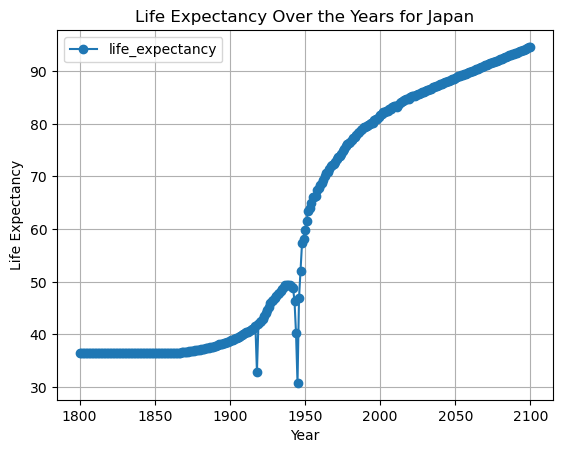

In [ ]:


# here I plotted the given country trend.

selected_country = 'Japan'  
df_country = final_df_ffill[final_df_ffill['country'] == selected_country]

plt.figure(figsize=(10, 6))
df_country.plot(x='year', y='life_expectancy', kind='line', marker='o', title=f'Life Expectancy Over the Years for {selected_country}')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()